# HREEYA SINGH

## DSIP - Advance level real-world based project on DataScience.

## Task2 - Make a color detection system with the help of Panda and Open CV based on the provided dataset.

Dataset link: https://github.com/codebrainz/color-names/blob/master/output/colors.csv

Import these libraries

In [ ]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
img = cv2.imread('colored_image.webp')

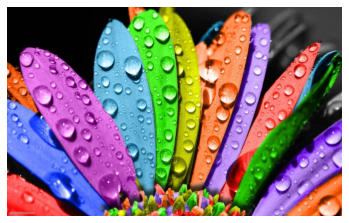

In [4]:
plt.imshow(img[:,:,::-1])
plt.axis(False)
plt.show()

In [5]:
mouse_click = False
r = g = b = xpos = ypos = 0

Read the color dataset

In [ ]:
index = ['color', 'color_name', 'hex', 'R', 'G', 'B']
data = pd.read_csv('colors.csv', names = index, header = None)
data.head()

In [6]:
data.shape

(865, 6)

Displaying text on the image

In [7]:
text = "Right Double Click to display corresponding image coordinates in dataset"
coordinates = (270,550)
font = cv2.FONT_ITALIC
fontScale = 0.5
color = (255,255,255)
thickness = 1
image = cv2.putText(img, text, coordinates, font, fontScale, color, thickness, cv2.LINE_AA)

Function to calculate minimum distance from all colors and get the most matching color

In [8]:
def getColorName(R,G,B):
    minimum = 10000
    for i in range(len(data)):
        d = abs(R- int(data.loc[i,"R"])) + abs(G- int(data.loc[i,"G"]))+ abs(B- int(data.loc[i,"B"]))
        if(d<=minimum):
            minimum = d
            cname = data.loc[i,"color_name"]
    return cname

Function to get x,y coordinates of mouse double click

In [9]:
def draw_function(event, x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        global b,g,r,xpos,ypos, mouse_click
        mouse_click = True
        xpos = x
        ypos = y
        b,g,r = image[y,x]
        b = int(b)
        g = int(g)
        r = int(r)
    elif event==cv2.EVENT_RBUTTONDBLCLK:
         # displaying the nearest coordinates from the dataset on the image window
        font = cv2.FONT_HERSHEY_SIMPLEX
        t = getColorName(r,g,b)
        red,blue,green=int(data.loc[data['color_name']==t]['R']),int(data.loc[data['color_name']==t]['B']),int(data.loc[data['color_name']==t]['G'])
        cv2.putText(image, str(red) + ',' +
                    str(green) + ',' + str(blue),
                    (x,y), 1, 1,
                    (255, 255, 255), 2)

In [10]:
cv2.namedWindow('Image for Color Detection-Left Button Mouse Double Click') #Window name in which the image is displayed
cv2.setMouseCallback('Image for Color Detection-Left Button Mouse Double Click',draw_function)

In [ ]:
while(1):

    cv2.imshow('Image for Color Detection-Left Button Mouse Double Click',image)
    if (mouse_click):
   
        #cv2.rectangle(image, startpoint, endpoint, color, thickness)-1 fills entire rectangle 
        cv2.rectangle(image,(20,20), (750,60), (b,g,r), -1)

        #Creating text string to display( Color name and RGB values )
        text = getColorName(r,g,b) + ' R='+ str(r) +  ' G='+ str(g) +  ' B='+ str(b)
        
        #cv2.putText(image,text,start,font(0-7),fontScale,color,thickness,lineType )
        cv2.putText(image, text,(50,50),2,0.8,(255,255,255),2,cv2.LINE_AA)

        #For very light colours we will display text in black colour
        if(r+g+b>=600):
            cv2.putText(image, text,(50,50),2,0.8,(0,0,0),2,cv2.LINE_AA)
            
        mouse_click=False

    #Break the loop when user hits 'esc' key    
    if cv2.waitKey(20) & 0xFF ==27:
        break
    
cv2.destroyAllWindows()